# Naive Bayes sport

In [ ]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported!")

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
    --------------------------------------- 4.5/331.9 MB 26.9 MB/s eta 0:00:13
   -- ------------------------------------- 18.1/331.9 MB 52.0 MB/s eta 0:00:07
   -- ------------------------------------- 24.1/331.9 MB 41.3 MB/s eta 0:00:08
   --- ------------------------------------ 27.8/331.9 MB 34.5 MB/s eta 0:00:09
   --- ------------------------------------ 31.2/331.9 MB 30.5 MB/s eta 0:00:10
   ---- ----------------------------------- 34.6/331.9 MB 28.2 MB/s eta 0:00:11
   ---- -------------

In [ ]:
file_path = 'sport_url_scraper/selected_articles.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print(f"Number of articles: {len(data)}")

Number of articles: 3042


In [ ]:
texts = []
labels = []

for article in data:
    texts.append(article['text'])
    labels.append(article['label'])

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set: {len(X_train)} articles")
print(f"Test set: {len(X_test)} articles")
print(f"Categories in training set: {Counter(y_train)}")


Training set: 2433 articles
Test set: 609 articles
Categories in training set: Counter({'rugby-union': 320, 'football': 320, 'formula1': 320, 'cricket': 320, 'boxing': 307, 'rugby-league': 267, 'tennis': 213, 'american-football': 199, 'mixed-martial-arts': 167})


In [ ]:
classifier = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        token_pattern=r'\b[a-z]+\b',
        min_df=2,
        max_features=10000
    )),
    ('classifier', MultinomialNB(alpha=1.0))
])

classifier.fit(X_train, y_train)

print("✓ Trained!")
print(f"Number of features (words): {len(classifier.named_steps['vectorizer'].vocabulary_)}")


✓ Trained!
Number of features (words): 10000


In [ ]:
print("Predicting categories for test set...")
predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100

print(f"\n{'='*80}")
print(f"ACCURACY: {accuracy:.2f}%")
print(f"{'='*80}")

print("\nDetailed classification report:")
print("="*80)
report = classification_report(y_test, predictions, output_dict=True, zero_division=0)

results = []
for label in sorted(report.keys()):
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        results.append({
            'Category': label,
            'Precision': f"{report[label]['precision']:.4f}",
            'Recall': f"{report[label]['recall']:.4f}",
            'F1-Score': f"{report[label]['f1-score']:.4f}"
        })

df = pd.DataFrame(results)
df['Precision'] = pd.to_numeric(df['Precision'])
df['Recall'] = pd.to_numeric(df['Recall'])
df['F1-Score'] = pd.to_numeric(df['F1-Score'])

styled_df = df.style.format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}).background_gradient(subset=['Precision', 'Recall', 'F1-Score'], cmap='YlGnBu', vmin=0, vmax=1).set_caption(f'Overall Accuracy: {accuracy:.2f}%').set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])

display(styled_df)
print("="*80)


Predicting categories for test set...

ACCURACY: 99.34%

Detailed classification report:


,Category,Precision,Recall,F1-Score
0,american-football,1.0000,1.0000,1.0000
1,boxing,1.0000,1.0000,1.0000
2,cricket,1.0000,1.0000,1.0000
3,football,1.0000,0.9625,0.9809
4,formula1,1.0000,1.0000,1.0000
5,mixed-martial-arts,1.0000,1.0000,1.0000
6,rugby-league,1.0000,0.9851,0.9925
7,rugby-union,0.9524,1.0000,0.9756
8,tennis,1.0000,1.0000,1.0000


<Axes: >

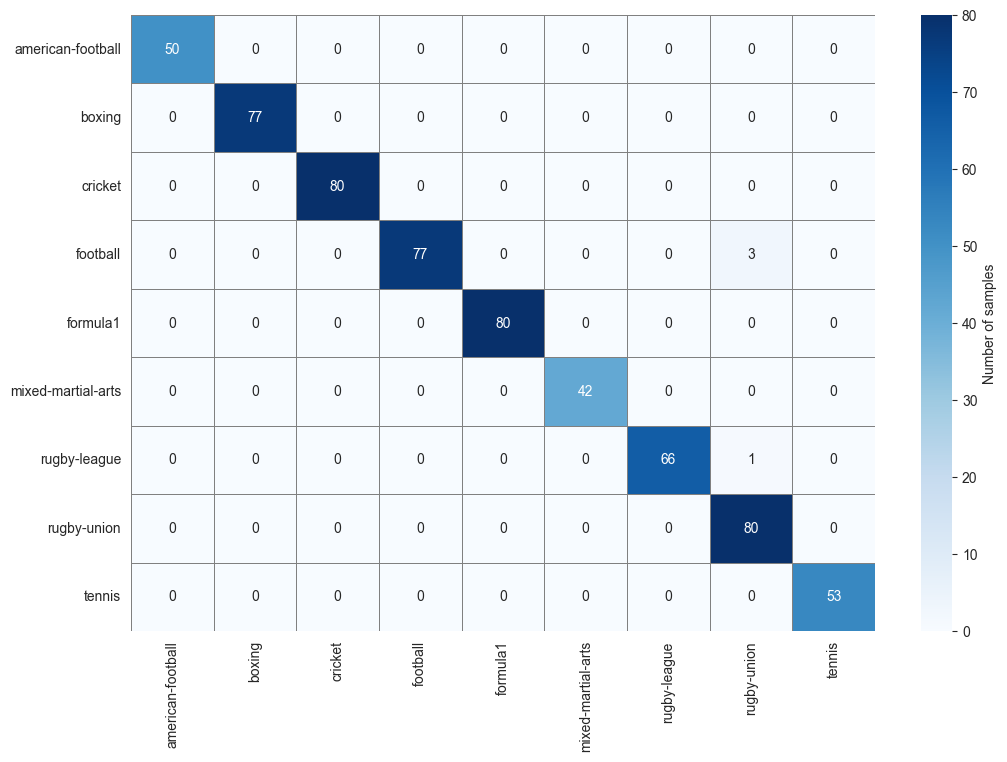

In [ ]:
from sklearn.utils.multiclass import unique_labels

labels = list(unique_labels(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=labels)
categories = labels

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=categories,
    yticklabels=categories,
    cbar_kws={'label': 'Number of samples'},
    linewidths=0.5,
    linecolor='gray'
)


# LinearSVC


In [ ]:
linear_svc_classifier = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        token_pattern=r'\b[a-z]+\b',
        min_df=2,
        max_features=10000
    )),
    ('classifier', LinearSVC(random_state=42, max_iter=1000))
])

print("="*80)
print("LINEAR SVC CLASSIFIER FROM SCIKIT-LEARN")
print("="*80)
print("\nTraining LinearSVC classifier...")

linear_svc_classifier.fit(X_train, y_train)

print("✓ Trained!")
print(f"Number of features (words): {len(linear_svc_classifier.named_steps['vectorizer'].vocabulary_)}")


LINEAR SVC CLASSIFIER FROM SCIKIT-LEARN

Training LinearSVC classifier...
✓ Trained!
Number of features (words): 10000


c:\Users\Krzysztof\Desktop\DataMining\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc_predictions = linear_svc_classifier.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_predictions) * 100

svc_report = classification_report(y_test, svc_predictions, output_dict=True, zero_division=0)

svc_results = []
for label in sorted(svc_report.keys()):
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        svc_results.append({
            'Category': label,
            'Precision': f"{svc_report[label]['precision']:.4f}",
            'Recall': f"{svc_report[label]['recall']:.4f}",
            'F1-Score': f"{svc_report[label]['f1-score']:.4f}"
        })

svc_df = pd.DataFrame(svc_results)
svc_df['Precision'] = pd.to_numeric(svc_df['Precision'])
svc_df['Recall'] = pd.to_numeric(svc_df['Recall'])
svc_df['F1-Score'] = pd.to_numeric(svc_df['F1-Score'])

styled_svc_df = svc_df.style.format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}).background_gradient(subset=['Precision', 'Recall', 'F1-Score'], cmap='YlGnBu', vmin=0, vmax=1).set_caption(f'Overall Accuracy: {svc_accuracy:.2f}%').set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])

display(styled_svc_df)


,Category,Precision,Recall,F1-Score
0,american-football,1.0000,1.0000,1.0000
1,boxing,0.9872,1.0000,0.9935
2,cricket,0.9877,1.0000,0.9938
3,football,0.9630,0.9750,0.9689
4,formula1,1.0000,1.0000,1.0000
5,mixed-martial-arts,1.0000,0.9524,0.9756
6,rugby-league,1.0000,0.9701,0.9848
7,rugby-union,0.9634,0.9875,0.9753
8,tennis,1.0000,0.9811,0.9905


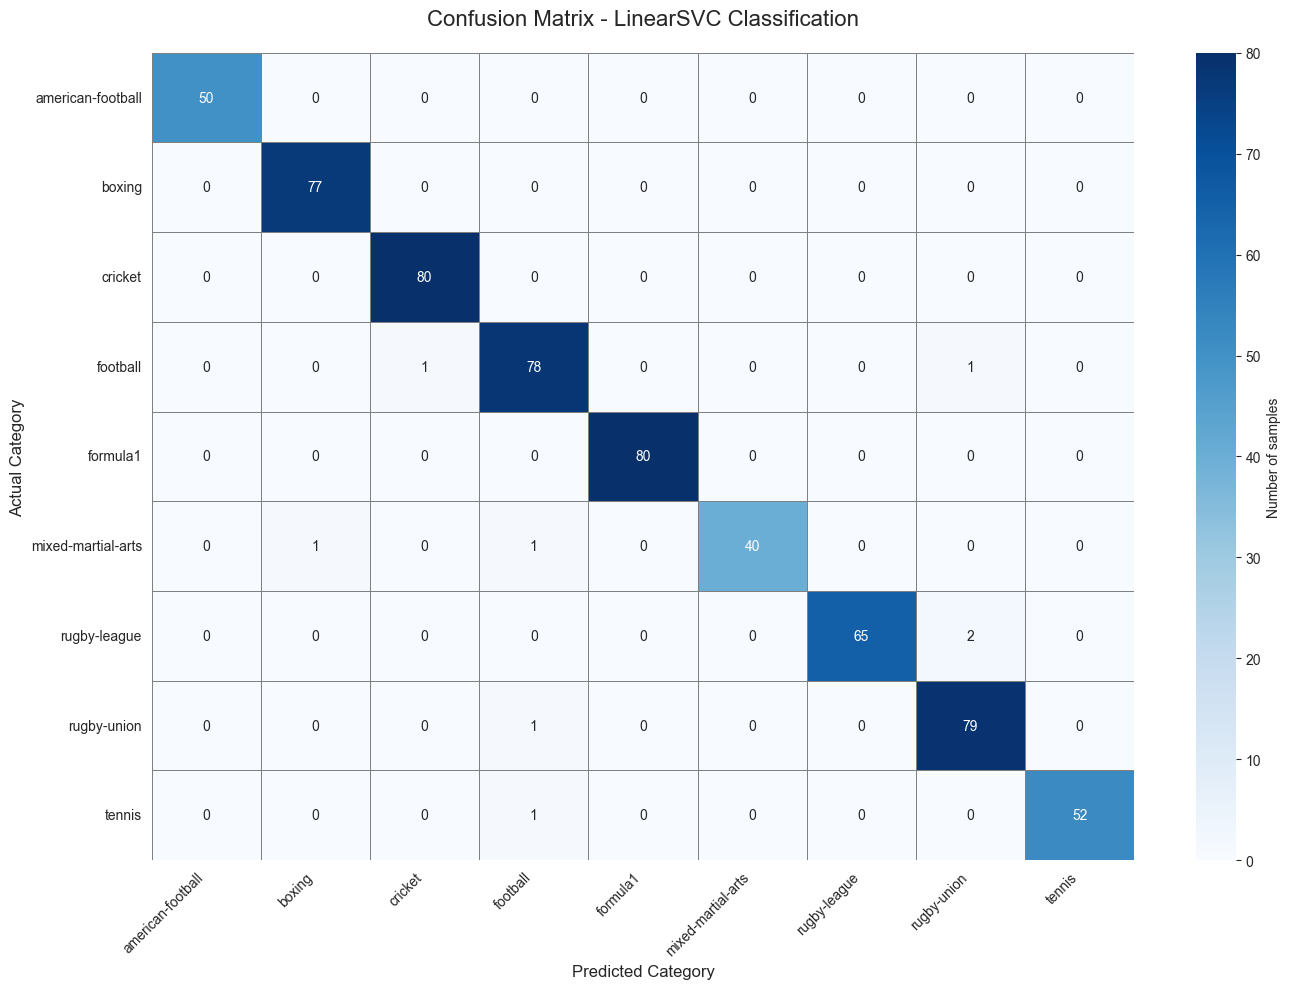


Detailed statistics for each category:

american-football:
  Correct predictions: 50
  Incorrect predictions: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

boxing:
  Correct predictions: 77
  Incorrect predictions: 1
  Precision: 98.72%
  Recall: 100.00%
  Accuracy: 98.72%

cricket:
  Correct predictions: 80
  Incorrect predictions: 1
  Precision: 98.77%
  Recall: 100.00%
  Accuracy: 98.77%

football:
  Correct predictions: 78
  Incorrect predictions: 5
  Precision: 96.30%
  Recall: 97.50%
  Accuracy: 93.98%

formula1:
  Correct predictions: 80
  Incorrect predictions: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

mixed-martial-arts:
  Correct predictions: 40
  Incorrect predictions: 2
  Precision: 100.00%
  Recall: 95.24%
  Accuracy: 95.24%

rugby-league:
  Correct predictions: 65
  Incorrect predictions: 2
  Precision: 100.00%
  Recall: 97.01%
  Accuracy: 97.01%

rugby-union:
  Correct predictions: 79
  Incorrect predictions: 4
  Precision: 96.34%
  R

In [ ]:
from sklearn.utils.multiclass import unique_labels

svc_labels = list(unique_labels(y_test, svc_predictions))
svc_cm = confusion_matrix(y_test, svc_predictions, labels=svc_labels)
svc_categories = svc_labels

plt.figure(figsize=(14, 10))
sns.heatmap(
    svc_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=svc_categories,
    yticklabels=svc_categories,
    cbar_kws={'label': 'Number of samples'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Confusion Matrix - LinearSVC Classification', fontsize=16, pad=20)
plt.xlabel('Predicted Category', fontsize=12)
plt.ylabel('Actual Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nDetailed statistics for each category:")
print("="*80)
for i, category in enumerate(svc_categories):
    tp = svc_cm[i, i]
    fp = svc_cm[:, i].sum() - tp
    fn = svc_cm[i, :].sum() - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracy_cat = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0

    print(f"\n{category}:")
    print(f"  Correct predictions: {tp}")
    print(f"  Incorrect predictions: {fp + fn}")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall: {recall*100:.2f}%")
    print(f"  Accuracy: {accuracy_cat*100:.2f}%")
print("="*80)


# CNN (Conv1D) for Text Classification


In [ ]:
print("="*80)
print("CNN (CONV1D) CLASSIFIER FOR TEXT")
print("="*80)
print("\nPreparing data for CNN...")

max_words = 10000
max_len = 500

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

print(f"Vocabulary size: {max_words}")
print(f"Sequence length: {max_len}")
print(f"Number of classes: {num_classes}")
print(f"Training samples: {len(X_train_padded)}")
print(f"Test samples: {len(X_test_padded)}")


CNN (CONV1D) CLASSIFIER FOR TEXT

Preparing data for CNN...
Vocabulary size: 10000
Sequence length: 500
Number of classes: 9
Training samples: 2433
Test samples: 609


In [ ]:
embedding_dim = 128

cnn_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("CNN Model Architecture:")
cnn_model.summary()


CNN Model Architecture:


c:\Users\Krzysztof\Desktop\DataMining\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining CNN classifier...")

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = cnn_model.fit(
    X_train_padded, y_train_categorical,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("✓ Trained!")



Training CNN classifier...
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1912 - loss: 2.1362 - val_accuracy: 0.3943 - val_loss: 1.9517
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5529 - loss: 1.4016 - val_accuracy: 0.8296 - val_loss: 0.6700
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8859 - loss: 0.4474 - val_accuracy: 0.9281 - val_loss: 0.2526
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9430 - loss: 0.2204 - val_accuracy: 0.9466 - val_loss: 0.1555
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9707 - loss: 0.1293 - val_accuracy: 0.9692 - val_loss: 0.1072
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9851 - loss: 0.0794 - val_accuracy: 0.9733 - val_loss: 0.0946
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9918 - loss: 0.0430 - val_accuracy: 0.9754 - val_loss: 0.0861
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9933 - loss: 0.036

In [ ]:
cnn_predictions_proba = cnn_model.predict(X_test_padded, verbose=0)
cnn_predictions_encoded = np.argmax(cnn_predictions_proba, axis=1)
cnn_predictions = label_encoder.inverse_transform(cnn_predictions_encoded)

cnn_accuracy = accuracy_score(y_test, cnn_predictions) * 100

cnn_report = classification_report(y_test, cnn_predictions, output_dict=True, zero_division=0)

cnn_results = []
for label in sorted(cnn_report.keys()):
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        cnn_results.append({
            'Category': label,
            'Precision': f"{cnn_report[label]['precision']:.4f}",
            'Recall': f"{cnn_report[label]['recall']:.4f}",
            'F1-Score': f"{cnn_report[label]['f1-score']:.4f}"
        })

cnn_df = pd.DataFrame(cnn_results)
cnn_df['Precision'] = pd.to_numeric(cnn_df['Precision'])
cnn_df['Recall'] = pd.to_numeric(cnn_df['Recall'])
cnn_df['F1-Score'] = pd.to_numeric(cnn_df['F1-Score'])

styled_cnn_df = cnn_df.style.format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}).background_gradient(subset=['Precision', 'Recall', 'F1-Score'], cmap='YlGnBu', vmin=0, vmax=1).set_caption(f'Overall Accuracy: {cnn_accuracy:.2f}%').set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])

display(styled_cnn_df)


,Category,Precision,Recall,F1-Score
0,american-football,0.9600,0.9600,0.9600
1,boxing,0.9610,0.9610,0.9610
2,cricket,0.9875,0.9875,0.9875
3,football,0.9512,0.9750,0.9630
4,formula1,1.0000,0.9875,0.9937
5,mixed-martial-arts,0.9318,0.9762,0.9535
6,rugby-league,0.9848,0.9701,0.9774
7,rugby-union,0.9744,0.9500,0.9620
8,tennis,0.9811,0.9811,0.9811


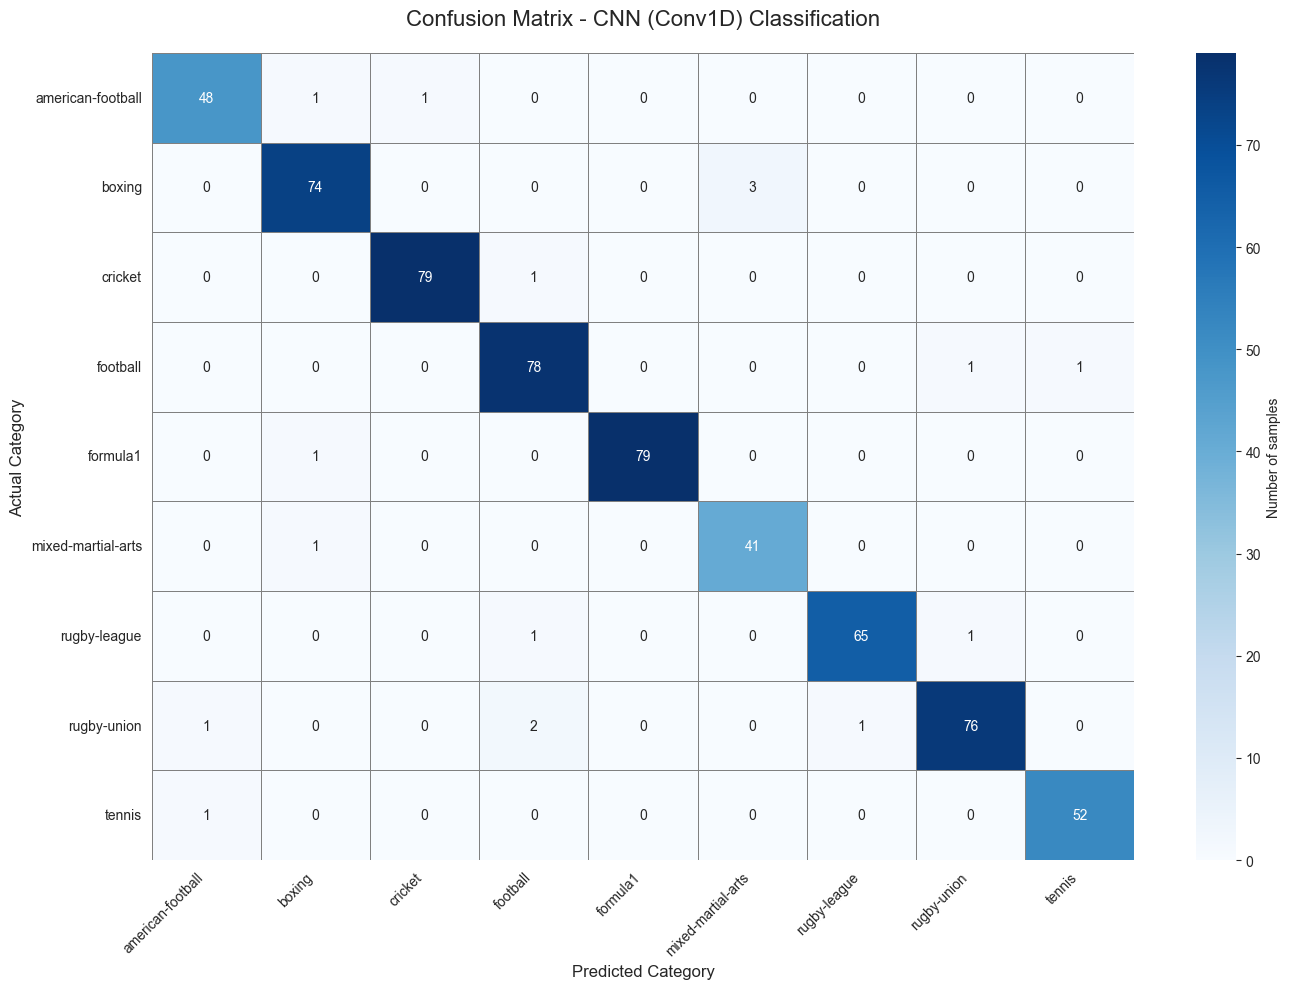

In [ ]:
from sklearn.utils.multiclass import unique_labels

cnn_labels = list(unique_labels(y_test, cnn_predictions))
cnn_cm = confusion_matrix(y_test, cnn_predictions, labels=cnn_labels)
cnn_categories = cnn_labels

plt.figure(figsize=(14, 10))
sns.heatmap(
    cnn_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=cnn_categories,
    yticklabels=cnn_categories,
    cbar_kws={'label': 'Number of samples'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Confusion Matrix - CNN (Conv1D) Classification', fontsize=16, pad=20)
plt.xlabel('Predicted Category', fontsize=12)
plt.ylabel('Actual Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


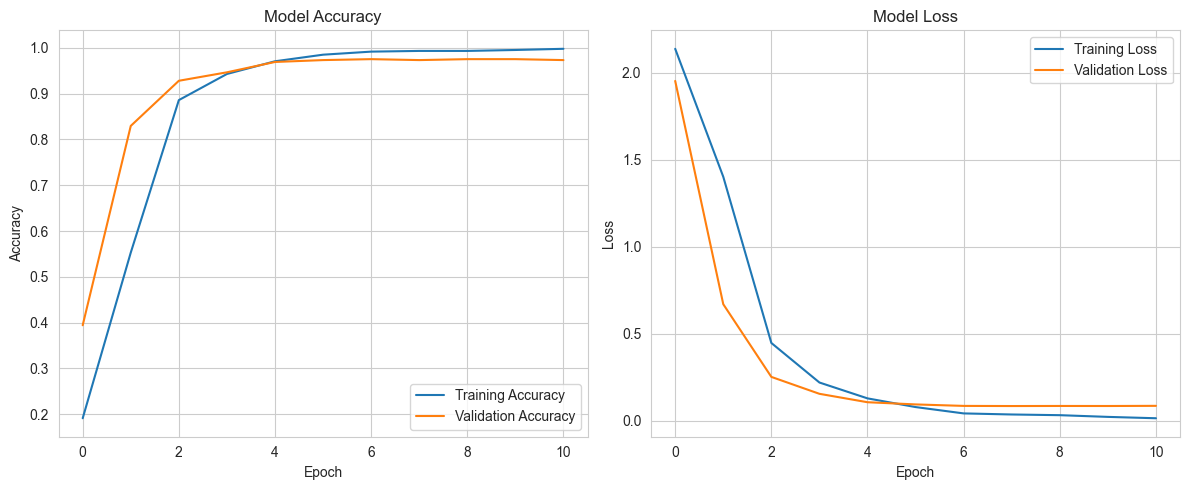

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Dense Neural Network for Text Classification


In [ ]:
print("="*80)
print("DENSE NEURAL NETWORK CLASSIFIER FOR TEXT")
print("="*80)
print("\nBuilding Dense NN model...")

# Reuse the same tokenized and padded data from CNN
# X_train_padded, X_test_padded, y_train_categorical, y_test_categorical are already prepared

embedding_dim_dense = 128

dense_model = Sequential([
    Embedding(max_words, embedding_dim_dense, input_length=max_len),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

dense_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Dense NN Model Architecture:")
dense_model.summary()


In [ ]:
print("\nTraining Dense NN classifier...")

early_stopping_dense = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_dense = dense_model.fit(
    X_train_padded, y_train_categorical,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_dense],
    verbose=1
)

print("✓ Trained!")


In [ ]:
dense_predictions_proba = dense_model.predict(X_test_padded, verbose=0)
dense_predictions_encoded = np.argmax(dense_predictions_proba, axis=1)
dense_predictions = label_encoder.inverse_transform(dense_predictions_encoded)

dense_accuracy = accuracy_score(y_test, dense_predictions) * 100

dense_report = classification_report(y_test, dense_predictions, output_dict=True, zero_division=0)

dense_results = []
for label in sorted(dense_report.keys()):
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        dense_results.append({
            'Category': label,
            'Precision': f"{dense_report[label]['precision']:.4f}",
            'Recall': f"{dense_report[label]['recall']:.4f}",
            'F1-Score': f"{dense_report[label]['f1-score']:.4f}"
        })

dense_df = pd.DataFrame(dense_results)
dense_df['Precision'] = pd.to_numeric(dense_df['Precision'])
dense_df['Recall'] = pd.to_numeric(dense_df['Recall'])
dense_df['F1-Score'] = pd.to_numeric(dense_df['F1-Score'])

styled_dense_df = dense_df.style.format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}).background_gradient(subset=['Precision', 'Recall', 'F1-Score'], cmap='YlGnBu', vmin=0, vmax=1).set_caption(f'Overall Accuracy: {dense_accuracy:.2f}%').set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])

display(styled_dense_df)


In [ ]:
from sklearn.utils.multiclass import unique_labels

dense_labels = list(unique_labels(y_test, dense_predictions))
dense_cm = confusion_matrix(y_test, dense_predictions, labels=dense_labels)
dense_categories = dense_labels

plt.figure(figsize=(14, 10))
sns.heatmap(
    dense_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=dense_categories,
    yticklabels=dense_categories,
    cbar_kws={'label': 'Number of samples'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Confusion Matrix - Dense NN Classification', fontsize=16, pad=20)
plt.xlabel('Predicted Category', fontsize=12)
plt.ylabel('Actual Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Training Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dense NN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Training Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.title('Dense NN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
